<a href="https://colab.research.google.com/github/kat-tian/Machine-Learning-Practice/blob/master/ind_col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clean & Analyze Dissertation Data** 

In [0]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

##IND-COL Data
Read in the data. Taking only useful columns starting at 17. This way, skip the useless metadata (e.g., langague = EN, device, etc.).

In [18]:
#Read data, only take useful columns
ind_col = pd.read_csv('ENGLISH_IND-COL.csv')
ind_col = ind_col.iloc[:,17:]
print('shape: ',ind_col.shape)

shape:  (295, 68)


## IND-COL Clean dataframe
Drop useless row (where title is repeated). Rename columns with easier to understand titles. Replace all 'NaN' with value 0. If a value is 0, it stands for 'other'/'no answer' in demographic columns or 'none' in retest columns. Change dtypes from object to int. Update reverse coded questions so 7=1 and 1=7. Outlier age 1991 updated to 28.

In [0]:
#drop row 1, remove "index" 
ind_col.drop(1, axis=0, inplace=True)
ind_col.reset_index(inplace=True)
ind_col.drop(columns=['index'], axis=1, inplace=True)

In [0]:
#rename columns
#get values to rename
values_torename = []

for col_name in ind_col.iloc[0]:
  values_torename.append(col_name)

In [0]:
#define keys for dict
keys = ind_col.columns.to_list()

In [0]:
#first get these key,value pairs; use VScode to update JSON manually
dict_toupdate = dict(zip(keys, values_torename))

In [0]:
#manually updated JSON
new_dict = {'Q10': 'education_selected',
 'Q10_10_TEXT': 'education_text',
 'Q16_1':  'people_defined_attributes_individuals',
 'Q16_2':  'people_independent_social_groups',
 'Q16_3':  'individuals_groups_can_separated',
 'Q17_1': 'individual_goals_more_group_goals',
 'Q17_2': 'individuals_behaviors_individual_goals',
 'Q17_3': 'individual_cannot_sacrificed',
 'Q17_4': 'individual_more_responsibilities',
 'Q18_1': 'win_versus_harmonize',
 'Q18_2': 'success_competition',
 'Q18_3': 'competition_more_harmony',
 'Q19_1': 'people_should_freewill',
 'Q19_2': 'disagree_follow_your_opinion',
 'Q19_3': 'individuality_morerespected_conformity',
 'Q23':  'informed_consent',
 'Q28_1': 'similar_john',
 'Q28_2': 'similar_alex',
 'Q28_3': 'identity_john',
 'Q28_4': 'identity_alex',
 'Q30_1': 'buy_pen',
 'Q30_2': 'try_pen',
 'Q30_3': 'vist_pen',
 'Q30_4': 'recommend_pen',
 'Q31': 'number_recomendations',
 'Q32': 'expensive_pen',
 'Q33': 'cheap_pen',
 'Q34_1': 'appealing',
 'Q34_10': 'sophisticated',
 'Q34_11': 'coherent',
 'Q34_12': 'high_quality',
 'Q34_2': 'informative',
 'Q34_3': 'useful',
 'Q34_4': 'positive',
 'Q34_5': 'good',
 'Q34_6': 'favorable',
 'Q34_7': 'attractive',
 'Q34_8': 'exciting',
 'Q34_9': 'clear',
 'Q35_1': 'attitude_dsesign',
 'Q35_2': 'attitude_trustworthiness',
 'Q35_3': 'attitude_reliability',
 'Q37': 'character_attended_school',
 'Q38': 'character_least_similar',
 'Q39': 'character_most_similar',
 'Q4': 'languages_selected',
 'Q40_1': 'recommendations_dependable',
 'Q40_2': 'recommendations_reliable',
 'Q40_3': 'recommendations_trustworthy',
 'Q40_4': 'recommendations_sincere',
 'Q42_1': 'pens_important',
 'Q42_2': 'pens_not_matter*',
 'Q42_3': 'pens_important_life',
 'Q42_4': 'pens_choose_carefully',
 'Q42_5': 'pens_use_matters',
 'Q42_6': 'pens_important_decison',
 'Q4_3_TEXT': 'languages_text',
 'Q5': 'age',
 'Q53': 're_character_attended_school',
 'Q54': 're_character_least_similar',
 'Q55': 're_character_most_similar',
 'Q6': 'sex',
 'Q7': 'country_born_selected',
 'Q7_5_TEXT': 'country_born_text',
 'Q8': 'ethnicity',
 'Q9': 'nationality_selected',
 'Q9_4_TEXT': 'nationality_text',
 'Random ID': 'random_id'}

In [0]:
#remane columns, drop row with old col names
ind_col.rename(columns=new_dict, inplace=True)
ind_col.drop(0, axis=0, inplace=True)
ind_col.reset_index(inplace=True)

#drop the extra index
ind_col.drop(columns=['index'], axis=1, inplace=True)

In [0]:
#some cells have two inputs '1,2'
#remove second number
ind_col['languages_selected'] = ind_col['languages_selected'].str.split(',').str[0]
ind_col['country_born_selected'] = ind_col['country_born_selected'].str.split(',').str[0]
ind_col['ethnicity'] = ind_col['ethnicity'].str.split(',').str[0]
ind_col['sex'] = ind_col['sex'].str.split(',').str[0]
ind_col['nationality_selected'] = ind_col['nationality_selected'].str.split(',').str[0]
ind_col['education_selected'] = ind_col['education_selected'].str.split(',').str[0]

In [26]:
#check na
print(ind_col.isna().sum())

# replace na with 0
ind_col.fillna(0, inplace=True)

informed_consent                 1
languages_selected               4
languages_text                 286
age                              4
sex                              5
                              ... 
recommendations_dependable      32
recommendations_reliable        32
recommendations_trustworthy     32
recommendations_sincere         32
random_id                        1
Length: 68, dtype: int64


In [27]:
#since the 'langague_text' have 0 to represent other
print('langague selected:\n', ind_col.languages_selected.value_counts())

#drop text fields
ind_col.drop(columns=['languages_text', 'country_born_text', 'nationality_text', 'education_text'], inplace=True)

langague selected:
 1    289
0      4
Name: languages_selected, dtype: int64


In [28]:
#all data types are objects, convert to int
ind_col = ind_col.astype('int')
print(ind_col.dtypes)

informed_consent               int64
languages_selected             int64
age                            int64
sex                            int64
country_born_selected          int64
                               ...  
recommendations_dependable     int64
recommendations_reliable       int64
recommendations_trustworthy    int64
recommendations_sincere        int64
random_id                      int64
Length: 64, dtype: object


In [0]:
#change reverse coded questions so 1=7, 2=3, 3=4, 4=5, 5=6, 6=7 and 7=1
def reverseScoring(df, high, cols):
    '''Reverse scores on given columns
     df = your data frame,
     high = highest score available
     cols = the columns you want reversed in list form'''
    df[cols] = high - df[cols]
    return df

#call function
ind_col = reverseScoring(ind_col, 7, ['pens_not_matter*'])

In [0]:
#change the outliers in age
ind_col.age.replace({1991:28, 1989:30, 1992:27}, inplace=True)

In [31]:
ind_col.head(2)

,informed_consent,languages_selected,age,sex,country_born_selected,ethnicity,nationality_selected,education_selected,people_defined_attributes_individuals,people_independent_social_groups,individuals_groups_can_separated,individual_goals_more_group_goals,individuals_behaviors_individual_goals,individual_cannot_sacrificed,individual_more_responsibilities,win_versus_harmonize,success_competition,competition_more_harmony,people_should_freewill,disagree_follow_your_opinion,individuality_morerespected_conformity,character_attended_school,character_least_similar,character_most_similar,re_character_attended_school,re_character_least_similar,re_character_most_similar,similar_john,similar_alex,identity_john,identity_alex,pens_important,pens_not_matter*,pens_important_life,pens_choose_carefully,pens_use_matters,pens_important_decison,number_recomendations,expensive_pen,cheap_pen,buy_pen,try_pen,vist_pen,recommend_pen,appealing,informative,useful,positive,good,favorable,attractive,exciting,clear,sophisticated,coherent,high_quality,attitude_dsesign,attitude_trustworthiness,attitude_reliability,recommendations_dependable,recommendations_reliable,recommendations_trustworthy,recommendations_sincere,random_id
0,1,1,32,1,2,1,1,5,5,7,7,6,4,6,0,6,5,6,7,5,7,2,1,2,0,0,0,7,6,6,7,6,2,5,6,6,7,2,2,4,6,5,5,6,5,4,5,5,4,3,3,4,4,5,3,5,6,7,6,7,6,5,6,4983
1,1,1,38,1,2,1,1,7,2,2,6,2,1,2,0,2,2,2,3,2,2,2,1,2,0,0,0,2,5,2,5,2,2,3,2,2,2,2,2,4,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,1,3,5,5,5,5,5,5,7249


## IND-COL Assign classes to each ID 
* IND-COL
* 1 = experiment; df = ind_col_1
* 0 = control; df = ind_col_0

In [0]:
## NEW DICT AFTER SURVEY COUNT INCREASED 

condition_id_pg1_NEW_1_11_20 = {'6552':1,'3095':1,'7391':0,'1067':1,'3983':0,
                              '7819':1,'8745':0,'8745':1,'9157':0,'6406':0}

condition_id_pg1_NEW_NEW_1_10 = {'2564':None, '2484':None, '9829':0, '5503':1, '3009':1,
                                 '9169': None, '5113':None, '1873':None, '7036':None, '4941':0 }

condition_id_pg1_NEW_NEW_11_20 = {'1664':1,'9581':None,'8345':1,'1246':None,'7048':None, 
                                  '7489':1, '8235':1, '6098':1, '4092':0, '3597':0}
                                  
condition_id_pg2_NEW_NEW_1_10 = {'2828':None, '1435':None, '1996':1, '7728':0, '2398':0,
                                 '6009':None, '4747':None, '5383':None,'3261':1, '4576':1}

condition_id_pg2_NEW_NEW_11_20 = {'5832':1,'8848':None,'5048':None,'8204':None,'3297':None, 
                                  '9942':None,'5441':None,'6062':1,'8254':1,'8413':0}

condition_id_pg3_NEW_NEW_1_10 = {'7863':None,'7755':None,'4315':1, '7820':None, '5001':0,
                                 '2639':None, '8730':0, '8909':1, '7500':1, '1083':1}

#this one repeats
condition_id_pg3_NEW_NEW_11_20 = {'1202':0, '4573':1,'5891':1,'1431':0,'8709':0,
                                 '1044':1,'3297':0,'6552':1,'3095':1,'7391':0}
#this one repeats
condition_id_pg4_NEW_NEW_1_10 = {'1067':1, '3983':0, '7819':1, '4902':0, '8745':1,
                                 '9157':0, '6406':0, '5477':0, '8588':0, '2189':1}

condition_id_pg4_NEW_NEW_11_20 = {'2781':1,'3127':1,'9405':0,'7320':1,'2029':0,
                                  '4858':1,'5164':1,'3364':0,'1807':0,'7247':1}

condition_id_pg5_NEW_NEW_1_10 = {'7653':0,'6949':0, '2509':0, '1515':1, '3773':1,
                                 '1240':1, '3070':1,'4932':0, '4259':0, '7177':1}

condition_id_pg5_NEW_NEW_11_20 = {'8169':0,'9306':0,'3600':1,'8667':0,'1383':1,
                                  '5536':1,'8005':1,'2790':0,'9953':1,'4788':0}

condition_id_pg6_NEW_NEW_1_10 = {'9176':0,'4427':1,'4188':0, '7478':1,'9372':0,
                                 '8879':1,'3332':1,'3745':0,'8507':1, '8385':1}

condition_id_pg6_NEW_NEW_11_20 = {'1768':0,'9779':1,'3662':1,'2609':0,'4415':0, 
                                  '2125':1, '5182':0,'8992':0,'6693':1,'9696':1}

condition_id_pg7_NEW_NEW_1_10 = {'7250':0,'6324':1,'7710':0,'4506':1,'2427':0,
                                 '8608':1, '4274':0,'7995':1,'9109':0,'5178':0}

condition_id_pg7_NEW_NEW_11_20 = {'3718':1,'7687':0,'2278':0,'6702':1,'4438':1,
                                  '4358':1,'6620':0,'7380':1,'2988':1,'4671':0}

condition_id_pg8_NEW_NEW_1_10 = {'1038':1, '1631':0, '1631':0, '3208':1, '4008':0,
                                 '2016':1, '8749':0, '8530':0, '4429':0, '3455':0}

condition_id_pg8_NEW_NEW_11_20 = {'6175':1,'3752':0,'1625':0,'3055':1,'7602':1,
                                  '8532':0,'9587':1,'7503':0,'2939':0,'6157':0}

condition_id_pg9_NEW_NEW_1_10 = {'2113':1,'3762':1,'5866':1,'9946':0,'4400':1,
                                 '6410':1,'3671':0,'1744':1,'8322':0,'6435':0}

condition_id_pg9_NEW_NEW_11_20 = {'1384':0,'9415':0,'3539':1,'2764':1,'5773':1,
                                  '8037':1,'5764':0,'6577':1,'1675':1,'4698':0}

condition_id_pg10_NEW_NEW_1_10 = {'5975':1,'5558':1,'3057':0,'4091':0,'6331':0,
                                  '9098':1,'4571':0,'8854':0,'8375':1,'7978':1}

condition_id_pg10_NEW_NEW_11_20 = {'7134':0,'4172':0,'6407':1,'4139':1,'7787':1,
                                   '6375':0,'1315':0,'1573':1,'5974':1,'1365':0}

condition_id_pg11_NEW_NEW_1_10 = {}

condition_id_pg11_NEW_NEW_11_20 = {}

condition_id_pg12_NEW_NEW_1_10 = {}

condition_id_pg12_NEW_NEW_11_20 = {}


#make new full ind-col condition list since so many new ones were collected
ind_col_condition = {'6552':1,'3095':1,'7391':0,'1067':1,'3983':0,'7819':1,'8745':0,'8745':1,'9157':0,'6406':0,
                     '2564':None, '2484':None, '9829':0, '5503':1, '3009':1,'9169': None, '5113':None, '1873':None, '7036':None, '4941':0,
                     '1664':1,'9581':None,'8345':1,'1246':None,'7048':None,'7489':1, '8235':1, '6098':1, '4092':0, '3597':0, 
                     '2828':None, '1435':None, '1996':1, '7728':0, '2398':0, '6009':None, '4747':None, '5383':None,'3261':1, '4576':1,
                     '5832':1,'8848':None,'5048':None,'8204':None,'3297':None,'9942':None,'5441':None,'6062':1,'8254':1,'8413':0,
                     '7863':None,'7755':None,'4315':1, '7820':None, '5001':0,'2639':None, '8730':0, '8909':1, '7500':1, '1083':1,
                     '1202':0, '4573':1,'5891':1,'1431':0,'8709':0,'1044':1,'3297':0,'6552':1,'3095':1,'7391':0,
                     '1067':1, '3983':0, '7819':1, '4902':0, '8745':1,'9157':0, '6406':0, '5477':0, '8588':0, '2189':1,
                     '2781':1,'3127':1,'9405':0,'7320':1,'2029':0,'4858':1,'5164':1,'3364':0,'1807':0,'7247':1,
                     '7653':0,'6949':0, '2509':0, '1515':1, '3773':1,'1240':1, '3070':1,'4932':0, '4259':0, '7177':1,
                     '8169':0,'9306':0,'3600':1,'8667':0,'1383':1,'5536':1,'8005':1,'2790':0,'9953':1,'4788':0,
                     '9176':0,'4427':1,'4188':0, '7478':1,'9372':0,'8879':1,'3332':1,'3745':0,'8507':1, '8385':1,
                     '1768':0,'9779':1,'3662':1,'2609':0,'4415':0,'2125':1, '5182':0,'8992':0,'6693':1,'9696':1,
                     '7250':0,'6324':1,'7710':0,'4506':1,'2427':0,'8608':1, '4274':0,'7995':1,'9109':0,'5178':0,
                     '3718':1,'7687':0,'2278':0,'6702':1,'4438':1,'4358':1,'6620':0,'7380':1,'2988':1,'4671':0,
                     '1038':1, '1631':0, '1631':0, '3208':1, '4008':0,'2016':1, '8749':0, '8530':0, '4429':0, '3455':0,
                     '6175':1,'3752':0,'1625':0,'3055':1,'7602':1,'8532':0,'9587':1,'7503':0,'2939':0,'6157':0,
                     '2113':1,'3762':1,'5866':1,'9946':0,'4400':1,'6410':1,'3671':0,'1744':1,'8322':0,'6435':0,
                     '1384':0,'9415':0,'3539':1,'2764':1,'5773':1,'8037':1,'5764':0,'6577':1,'1675':1,'4698':0,
                     '5975':1,'5558':1,'3057':0,'4091':0,'6331':0,'9098':1,'4571':0,'8854':0,'8375':1,'7978':1, 
                     '7134':0,'4172':0,'6407':1,'4139':1,'7787':1,'6375':0,'1315':0,'1573':1,'5974':1,'1365':0}


In [33]:
#make new full ind-col condition list since so many new ones were collected
ind_col_condition = {'6552':1,'3095':1,'7391':0,'1067':1,'3983':0,'7819':1,'8745':0,'8745':1,'9157':0,'6406':0,
                     '2564':None, '2484':None, '9829':0, '5503':1, '3009':1,'9169': None, '5113':None, '1873':None, '7036':None, '4941':0,
                     '1664':1,'9581':None,'8345':1,'1246':None,'7048':None,'7489':1, '8235':1, '6098':1, '4092':0, '3597':0, 
                     '2828':None, '1435':None, '1996':1, '7728':0, '2398':0, '6009':None, '4747':None, '5383':None,'3261':1, '4576':1,
                     '5832':1,'8848':None,'5048':None,'8204':None,'3297':None,'9942':None,'5441':None,'6062':1,'8254':1,'8413':0,
                     '7863':None,'7755':None,'4315':1, '7820':None, '5001':0,'2639':None, '8730':0, '8909':1, '7500':1, '1083':1,
                     '1202':0, '4573':1,'5891':1,'1431':0,'8709':0,'1044':1,'3297':0,'6552':1,'3095':1,'7391':0,
                     '1067':1, '3983':0, '7819':1, '4902':0, '8745':1,'9157':0, '6406':0, '5477':0, '8588':0, '2189':1,
                     '2781':1,'3127':1,'9405':0,'7320':1,'2029':0,'4858':1,'5164':1,'3364':0,'1807':0,'7247':1,
                     '7653':0,'6949':0, '2509':0, '1515':1, '3773':1,'1240':1, '3070':1,'4932':0, '4259':0, '7177':1,
                     '8169':0,'9306':0,'3600':1,'8667':0,'1383':1,'5536':1,'8005':1,'2790':0,'9953':1,'4788':0,
                     '9176':0,'4427':1,'4188':0, '7478':1,'9372':0,'8879':1,'3332':1,'3745':0,'8507':1, '8385':1,
                     '1768':0,'9779':1,'3662':1,'2609':0,'4415':0,'2125':1, '5182':0,'8992':0,'6693':1,'9696':1,
                     '7250':0,'6324':1,'7710':0,'4506':1,'2427':0,'8608':1, '4274':0,'7995':1,'9109':0,'5178':0,
                     '3718':1,'7687':0,'2278':0,'6702':1,'4438':1,'4358':1,'6620':0,'7380':1,'2988':1,'4671':0,
                     '1038':1, '1631':0, '1631':0, '3208':1, '4008':0,'2016':1, '8749':0, '8530':0, '4429':0, '3455':0,
                     '6175':1,'3752':0,'1625':0,'3055':1,'7602':1,'8532':0,'9587':1,'7503':0,'2939':0,'6157':0,
                     '2113':1,'3762':1,'5866':1,'9946':0,'4400':1,'6410':1,'3671':0,'1744':1,'8322':0,'6435':0,
                     '1384':0,'9415':0,'3539':1,'2764':1,'5773':1,'8037':1,'5764':0,'6577':1,'1675':1,'4698':0,
                     '5975':1,'5558':1,'3057':0,'4091':0,'6331':0,'9098':1,'4571':0,'8854':0,'8375':1,'7978':1, 
                     '7134':0,'4172':0,'6407':1,'4139':1,'7787':1,'6375':0,'1315':0,'1573':1,'5974':1,'1365':0}

#convert keys to int
ind_col_condition = {int(k):v for k,v in ind_col_condition.items()}
print(ind_col_condition)

{6552: 1, 3095: 1, 7391: 0, 1067: 1, 3983: 0, 7819: 1, 8745: 1, 9157: 0, 6406: 0, 2564: None, 2484: None, 9829: 0, 5503: 1, 3009: 1, 9169: None, 5113: None, 1873: None, 7036: None, 4941: 0, 1664: 1, 9581: None, 8345: 1, 1246: None, 7048: None, 7489: 1, 8235: 1, 6098: 1, 4092: 0, 3597: 0, 2828: None, 1435: None, 1996: 1, 7728: 0, 2398: 0, 6009: None, 4747: None, 5383: None, 3261: 1, 4576: 1, 5832: 1, 8848: None, 5048: None, 8204: None, 3297: 0, 9942: None, 5441: None, 6062: 1, 8254: 1, 8413: 0, 7863: None, 7755: None, 4315: 1, 7820: None, 5001: 0, 2639: None, 8730: 0, 8909: 1, 7500: 1, 1083: 1, 1202: 0, 4573: 1, 5891: 1, 1431: 0, 8709: 0, 1044: 1, 4902: 0, 5477: 0, 8588: 0, 2189: 1, 2781: 1, 3127: 1, 9405: 0, 7320: 1, 2029: 0, 4858: 1, 5164: 1, 3364: 0, 1807: 0, 7247: 1, 7653: 0, 6949: 0, 2509: 0, 1515: 1, 3773: 1, 1240: 1, 3070: 1, 4932: 0, 4259: 0, 7177: 1, 8169: 0, 9306: 0, 3600: 1, 8667: 0, 1383: 1, 5536: 1, 8005: 1, 2790: 0, 9953: 1, 4788: 0, 9176: 0, 4427: 1, 4188: 0, 7478: 1, 937

In [34]:
#add condition column
ind_col["condition"] = ind_col["random_id"].apply(lambda x: ind_col_condition.get(x))
ind_col.condition.value_counts()

1.0    92
0.0    85
Name: condition, dtype: int64

In [35]:
#drop all where condition is not 0.0 or 1.0
ind_col_0 = ind_col[ind_col['condition']==0.0]
ind_col_1 = ind_col[ind_col['condition']==1.0]

#concat frames to have where conditions are 0 or 1, remove all others
frames = [ind_col_0, ind_col_1]
ind_col = pd.concat(frames)

#after selecting where conditions are 0 or 1, all na removed
ind_col.isna().sum()

informed_consent               0
languages_selected             0
age                            0
sex                            0
country_born_selected          0
                              ..
recommendations_reliable       0
recommendations_trustworthy    0
recommendations_sincere        0
random_id                      0
condition                      0
Length: 65, dtype: int64

In [36]:
#why does it make an index and level 0 col?
ind_col.reset_index(inplace=True)
ind_col.drop(columns=['index'], axis=1, inplace=True)
ind_col.head(2)

,informed_consent,languages_selected,age,sex,country_born_selected,ethnicity,nationality_selected,education_selected,people_defined_attributes_individuals,people_independent_social_groups,individuals_groups_can_separated,individual_goals_more_group_goals,individuals_behaviors_individual_goals,individual_cannot_sacrificed,individual_more_responsibilities,win_versus_harmonize,success_competition,competition_more_harmony,people_should_freewill,disagree_follow_your_opinion,individuality_morerespected_conformity,character_attended_school,character_least_similar,character_most_similar,re_character_attended_school,re_character_least_similar,re_character_most_similar,similar_john,similar_alex,identity_john,identity_alex,pens_important,pens_not_matter*,pens_important_life,pens_choose_carefully,pens_use_matters,pens_important_decison,number_recomendations,expensive_pen,cheap_pen,buy_pen,try_pen,vist_pen,recommend_pen,appealing,informative,useful,positive,good,favorable,attractive,exciting,clear,sophisticated,coherent,high_quality,attitude_dsesign,attitude_trustworthiness,attitude_reliability,recommendations_dependable,recommendations_reliable,recommendations_trustworthy,recommendations_sincere,random_id,condition
0,1,1,25,2,2,1,1,5,6,7,6,7,6,7,0,6,5,6,5,6,6,2,1,2,0,0,0,6,7,6,7,7,1,7,6,7,6,2,2,4,7,6,7,6,5,4,5,5,5,4,4,5,4,5,5,4,7,6,6,6,7,6,6,8667,0.0
1,1,1,30,1,2,1,1,7,6,5,6,3,5,2,2,5,2,1,3,6,2,2,1,2,0,0,0,1,7,1,7,6,5,6,6,6,6,2,2,4,7,7,7,7,5,5,5,5,5,5,5,5,5,5,5,5,7,7,7,6,6,6,6,7134,0.0


## IND-COL High-Low Groups
Take the average of scores to represent IND-COL (high=individualism, low=collectivism). For each id, create new column "ind_score". Take sum responses/n if "individual_more_responsibilities" !=0. If "individual_more_responsibilities" == 0, take sum responses/n-1. Define threshold to split groups (e.g., thres=0.5). Create new column to identify if respondent is high vs. low on individualism. 

In [39]:
ind_col.head(2)

,informed_consent,languages_selected,age,sex,country_born_selected,ethnicity,nationality_selected,education_selected,people_defined_attributes_individuals,people_independent_social_groups,individuals_groups_can_separated,individual_goals_more_group_goals,individuals_behaviors_individual_goals,individual_cannot_sacrificed,individual_more_responsibilities,win_versus_harmonize,success_competition,competition_more_harmony,people_should_freewill,disagree_follow_your_opinion,individuality_morerespected_conformity,character_attended_school,character_least_similar,character_most_similar,re_character_attended_school,re_character_least_similar,re_character_most_similar,similar_john,similar_alex,identity_john,identity_alex,pens_important,pens_not_matter*,pens_important_life,pens_choose_carefully,pens_use_matters,pens_important_decison,number_recomendations,expensive_pen,cheap_pen,buy_pen,try_pen,vist_pen,recommend_pen,appealing,informative,useful,positive,good,favorable,attractive,exciting,clear,sophisticated,coherent,high_quality,attitude_dsesign,attitude_trustworthiness,attitude_reliability,recommendations_dependable,recommendations_reliable,recommendations_trustworthy,recommendations_sincere,random_id,condition
0,1,1,25,2,2,1,1,5,6,7,6,7,6,7,0,6,5,6,5,6,6,2,1,2,0,0,0,6,7,6,7,7,1,7,6,7,6,2,2,4,7,6,7,6,5,4,5,5,5,4,4,5,4,5,5,4,7,6,6,6,7,6,6,8667,0.0
1,1,1,30,1,2,1,1,7,6,5,6,3,5,2,2,5,2,1,3,6,2,2,1,2,0,0,0,1,7,1,7,6,5,6,6,6,6,2,2,4,7,7,7,7,5,5,5,5,5,5,5,5,5,5,5,5,7,7,7,6,6,6,6,7134,0.0


In [40]:
#print col names to sum over
print(ind_col.iloc[:,8:21].columns)

Index(['people_defined_attributes_individuals',
       'people_independent_social_groups', 'individuals_groups_can_separated',
       'individual_goals_more_group_goals',
       'individuals_behaviors_individual_goals',
       'individual_cannot_sacrificed', 'individual_more_responsibilities',
       'win_versus_harmonize', 'success_competition',
       'competition_more_harmony', 'people_should_freewill',
       'disagree_follow_your_opinion',
       'individuality_morerespected_conformity'],
      dtype='object')


In [0]:
#create list for cols to sum over
individualism_cols = ['people_defined_attributes_individuals',
       'people_independent_social_groups', 'individuals_groups_can_separated',
       'individual_goals_more_group_goals',
       'individuals_behaviors_individual_goals',
       'individual_cannot_sacrificed', 'individual_more_responsibilities',
       'win_versus_harmonize', 'success_competition',
       'competition_more_harmony', 'people_should_freewill',
       'disagree_follow_your_opinion',
       'individuality_morerespected_conformity']

In [0]:
#take sum/n of values if no 0, if 0, take sum/n-1
ind_col['ind_score'] = np.where(ind_col['individual_more_responsibilities']==0, (ind_col[individualism_cols].sum(axis=1))/(len(individualism_cols)-1) ,(ind_col[individualism_cols].sum(axis=1))/len(individualism_cols))

#define classes high_low ind, age
ind_col['young_age'] = np.where(ind_col['age']<=35, 1,0)
ind_col['high_individualism'] = np.where(ind_col['ind_score']>=5, 1,0)

## IND-COL DV Columns
Create columns that gives a score for each of the DVs. Take average for Likert scale, create binary for others. 

## IND-COL Visualizations and EDA

<function matplotlib.pyplot.tight_layout>

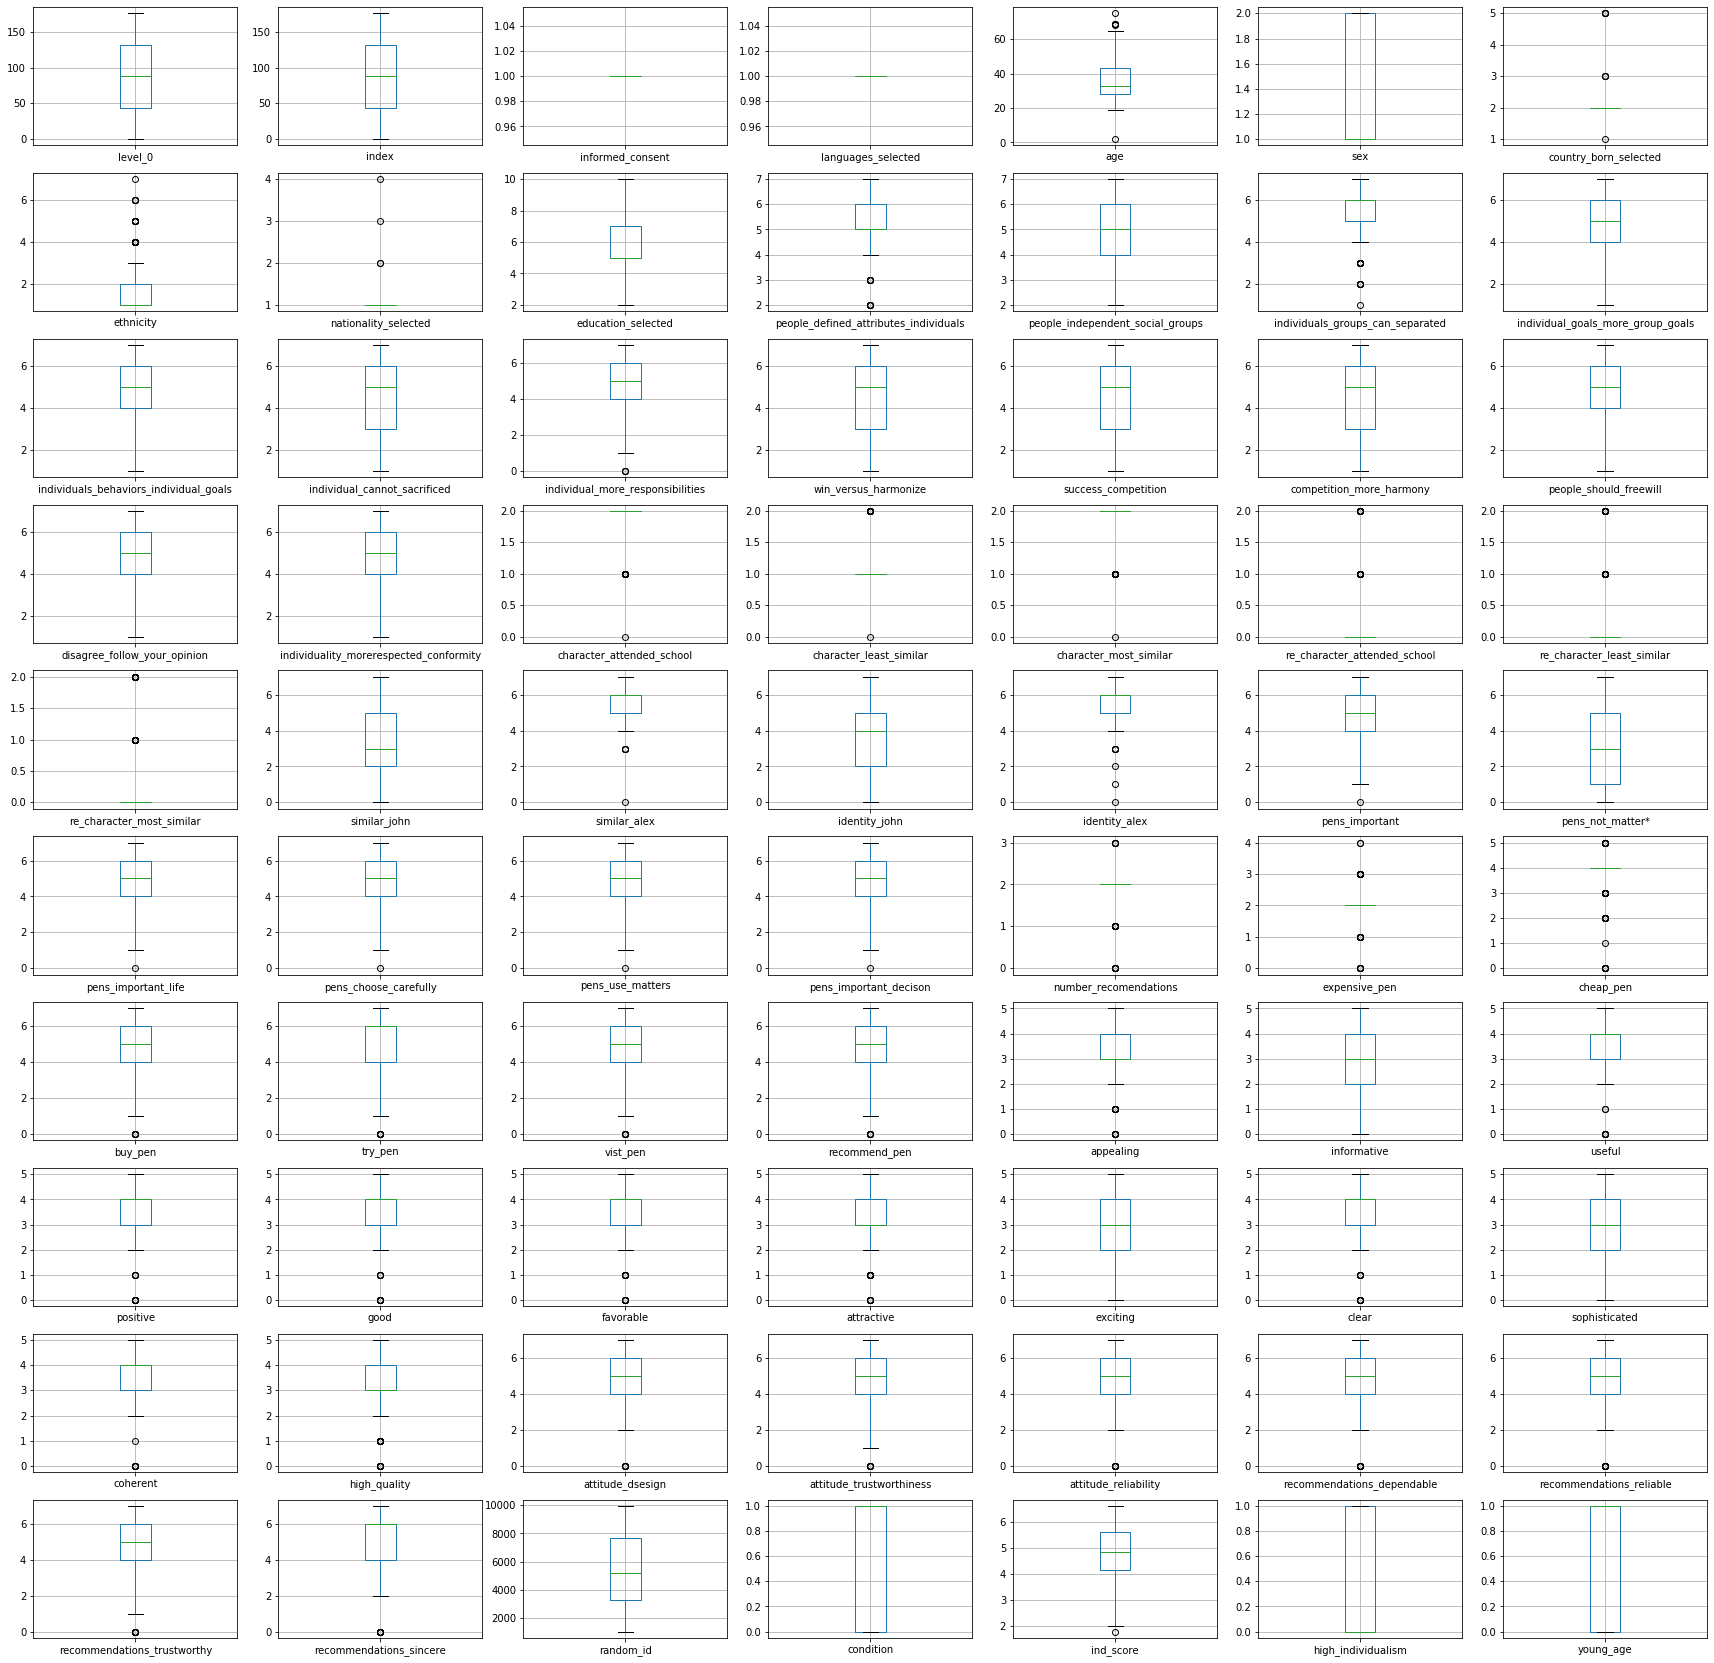

In [87]:
#print boxplots
fig, ax = plt.subplots(10,7, figsize=(30,30))
ax = ax.ravel()

for idx, col in enumerate(ind_col.columns):
  ind_col.boxplot(col, ax=ax[idx])
plt.tight_layout

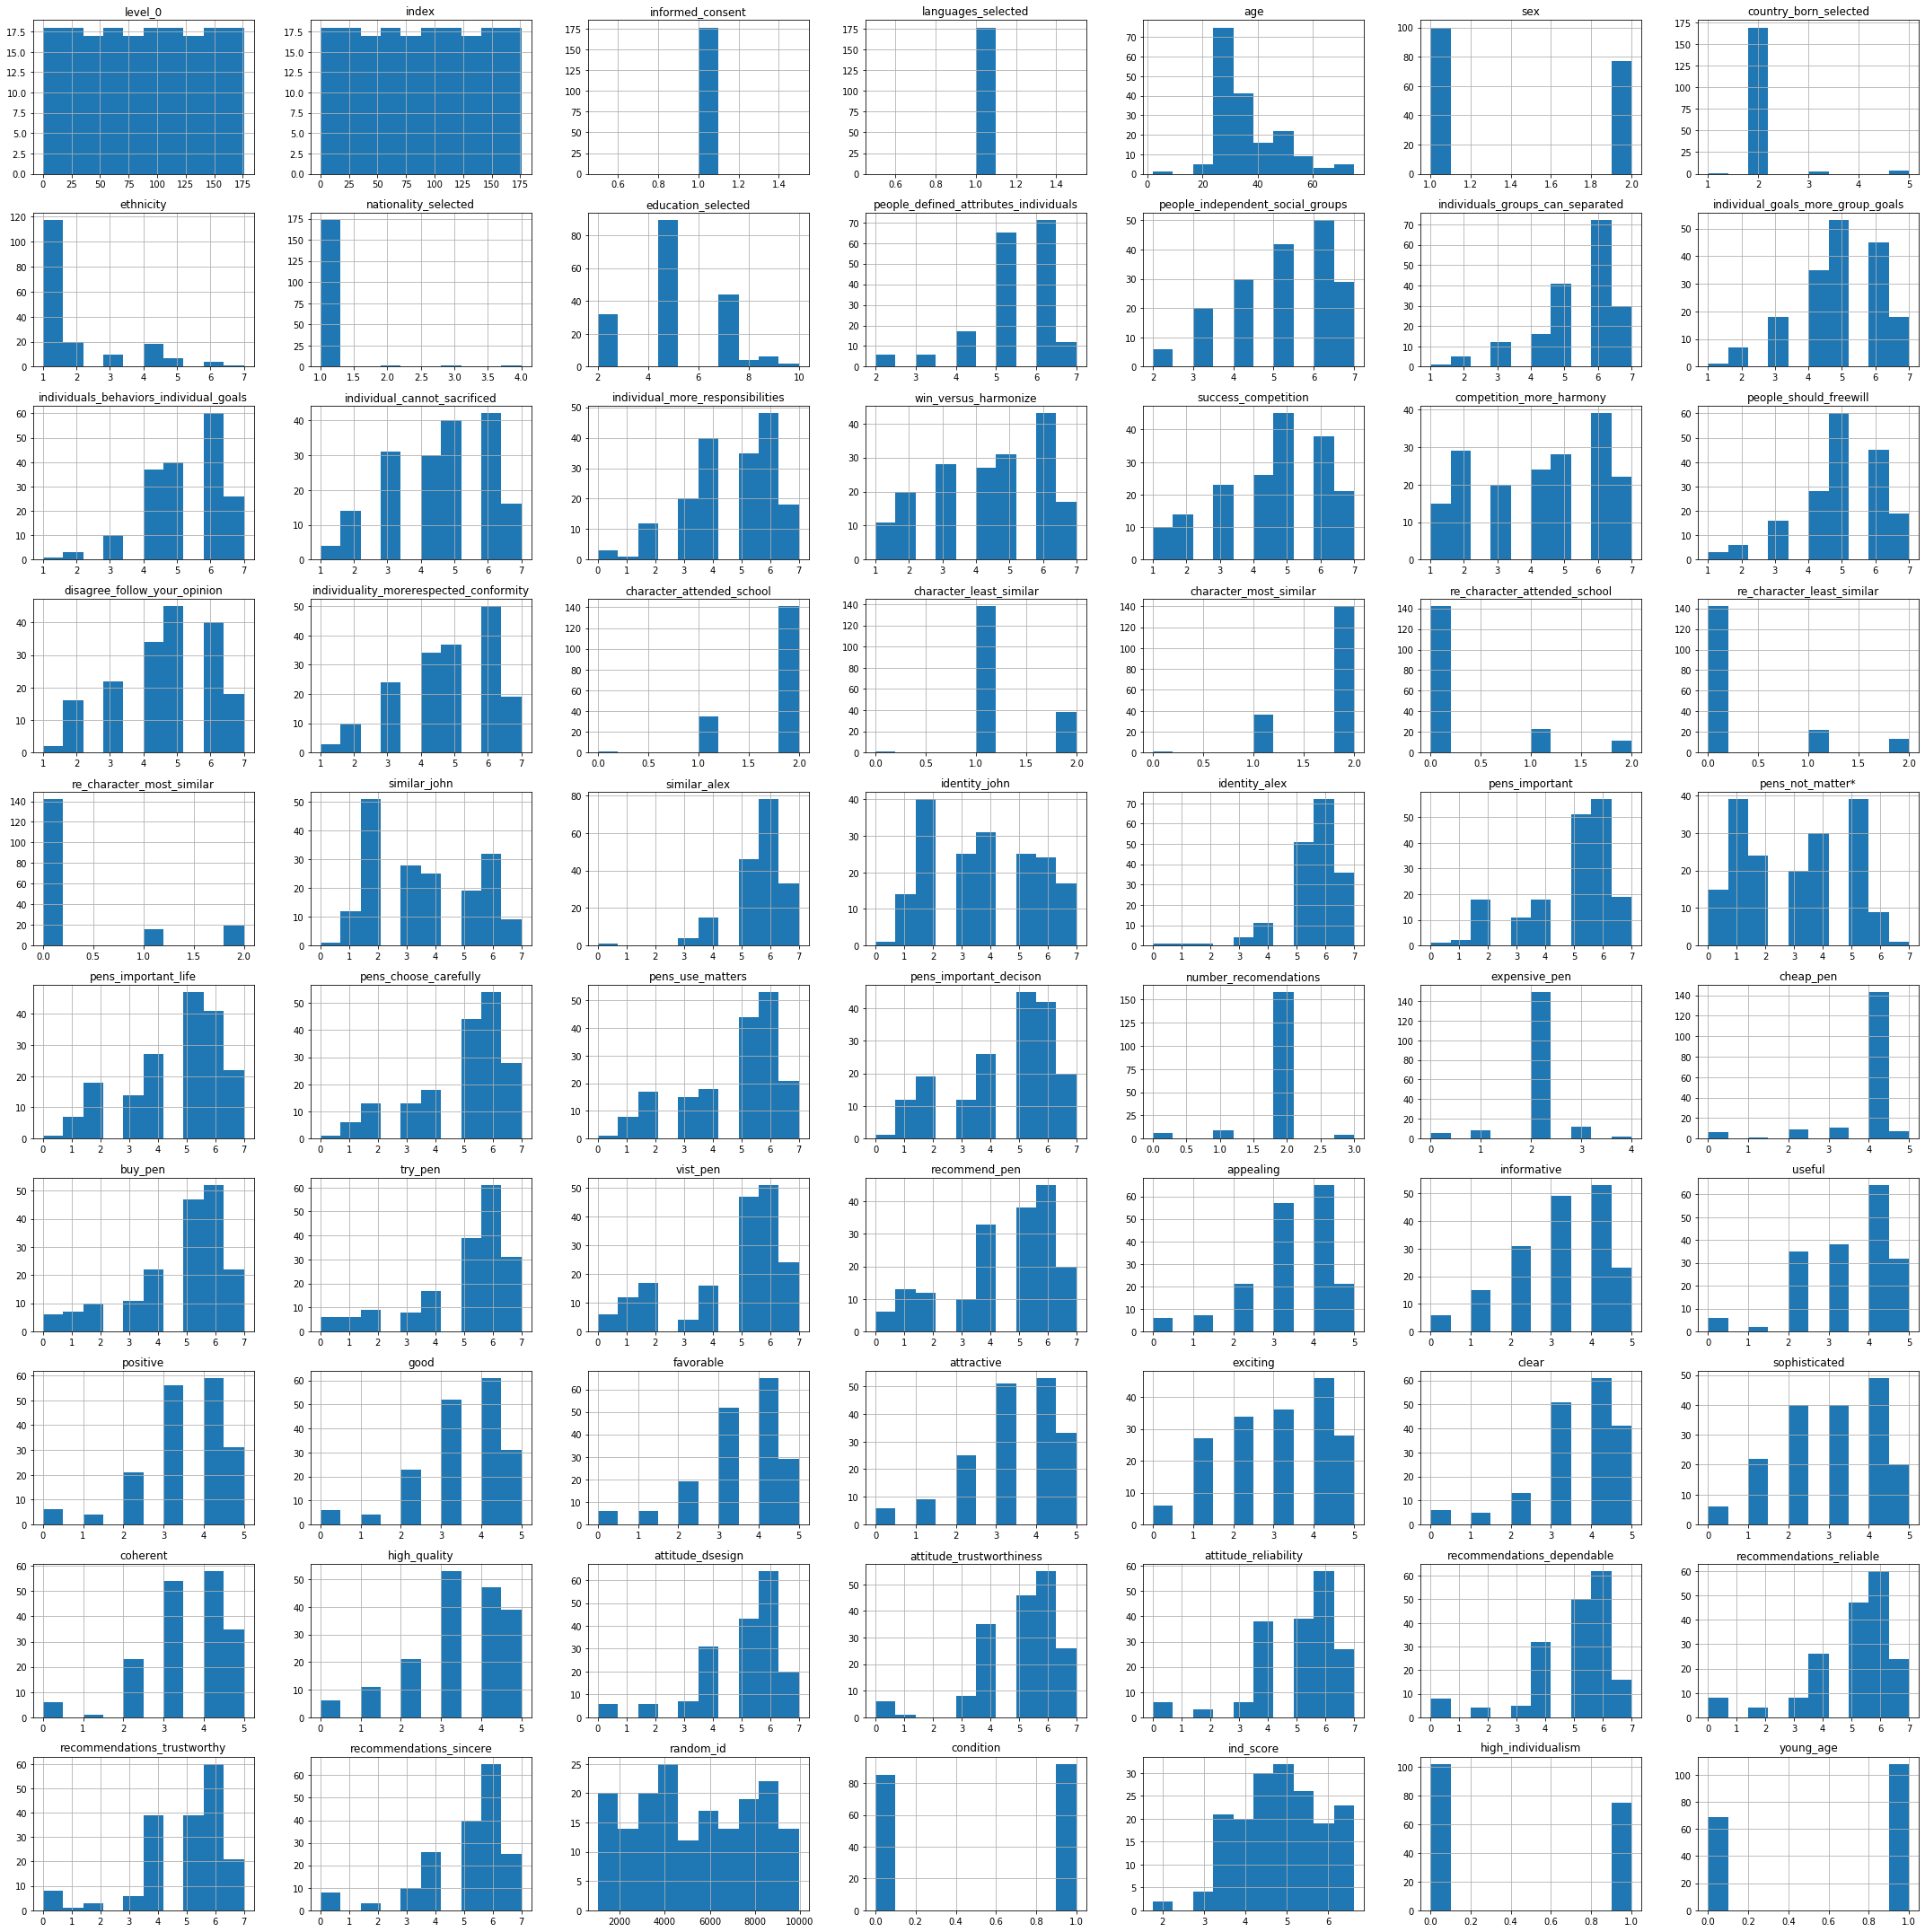

In [88]:
#print histograms
fig, ax = plt.subplots(10,7, figsize=(30,30))
ax = ax.ravel()

for idx, col in enumerate(ind_col.columns):
  ind_col.hist(col, ax=ax[idx])
plt.tight_layout()

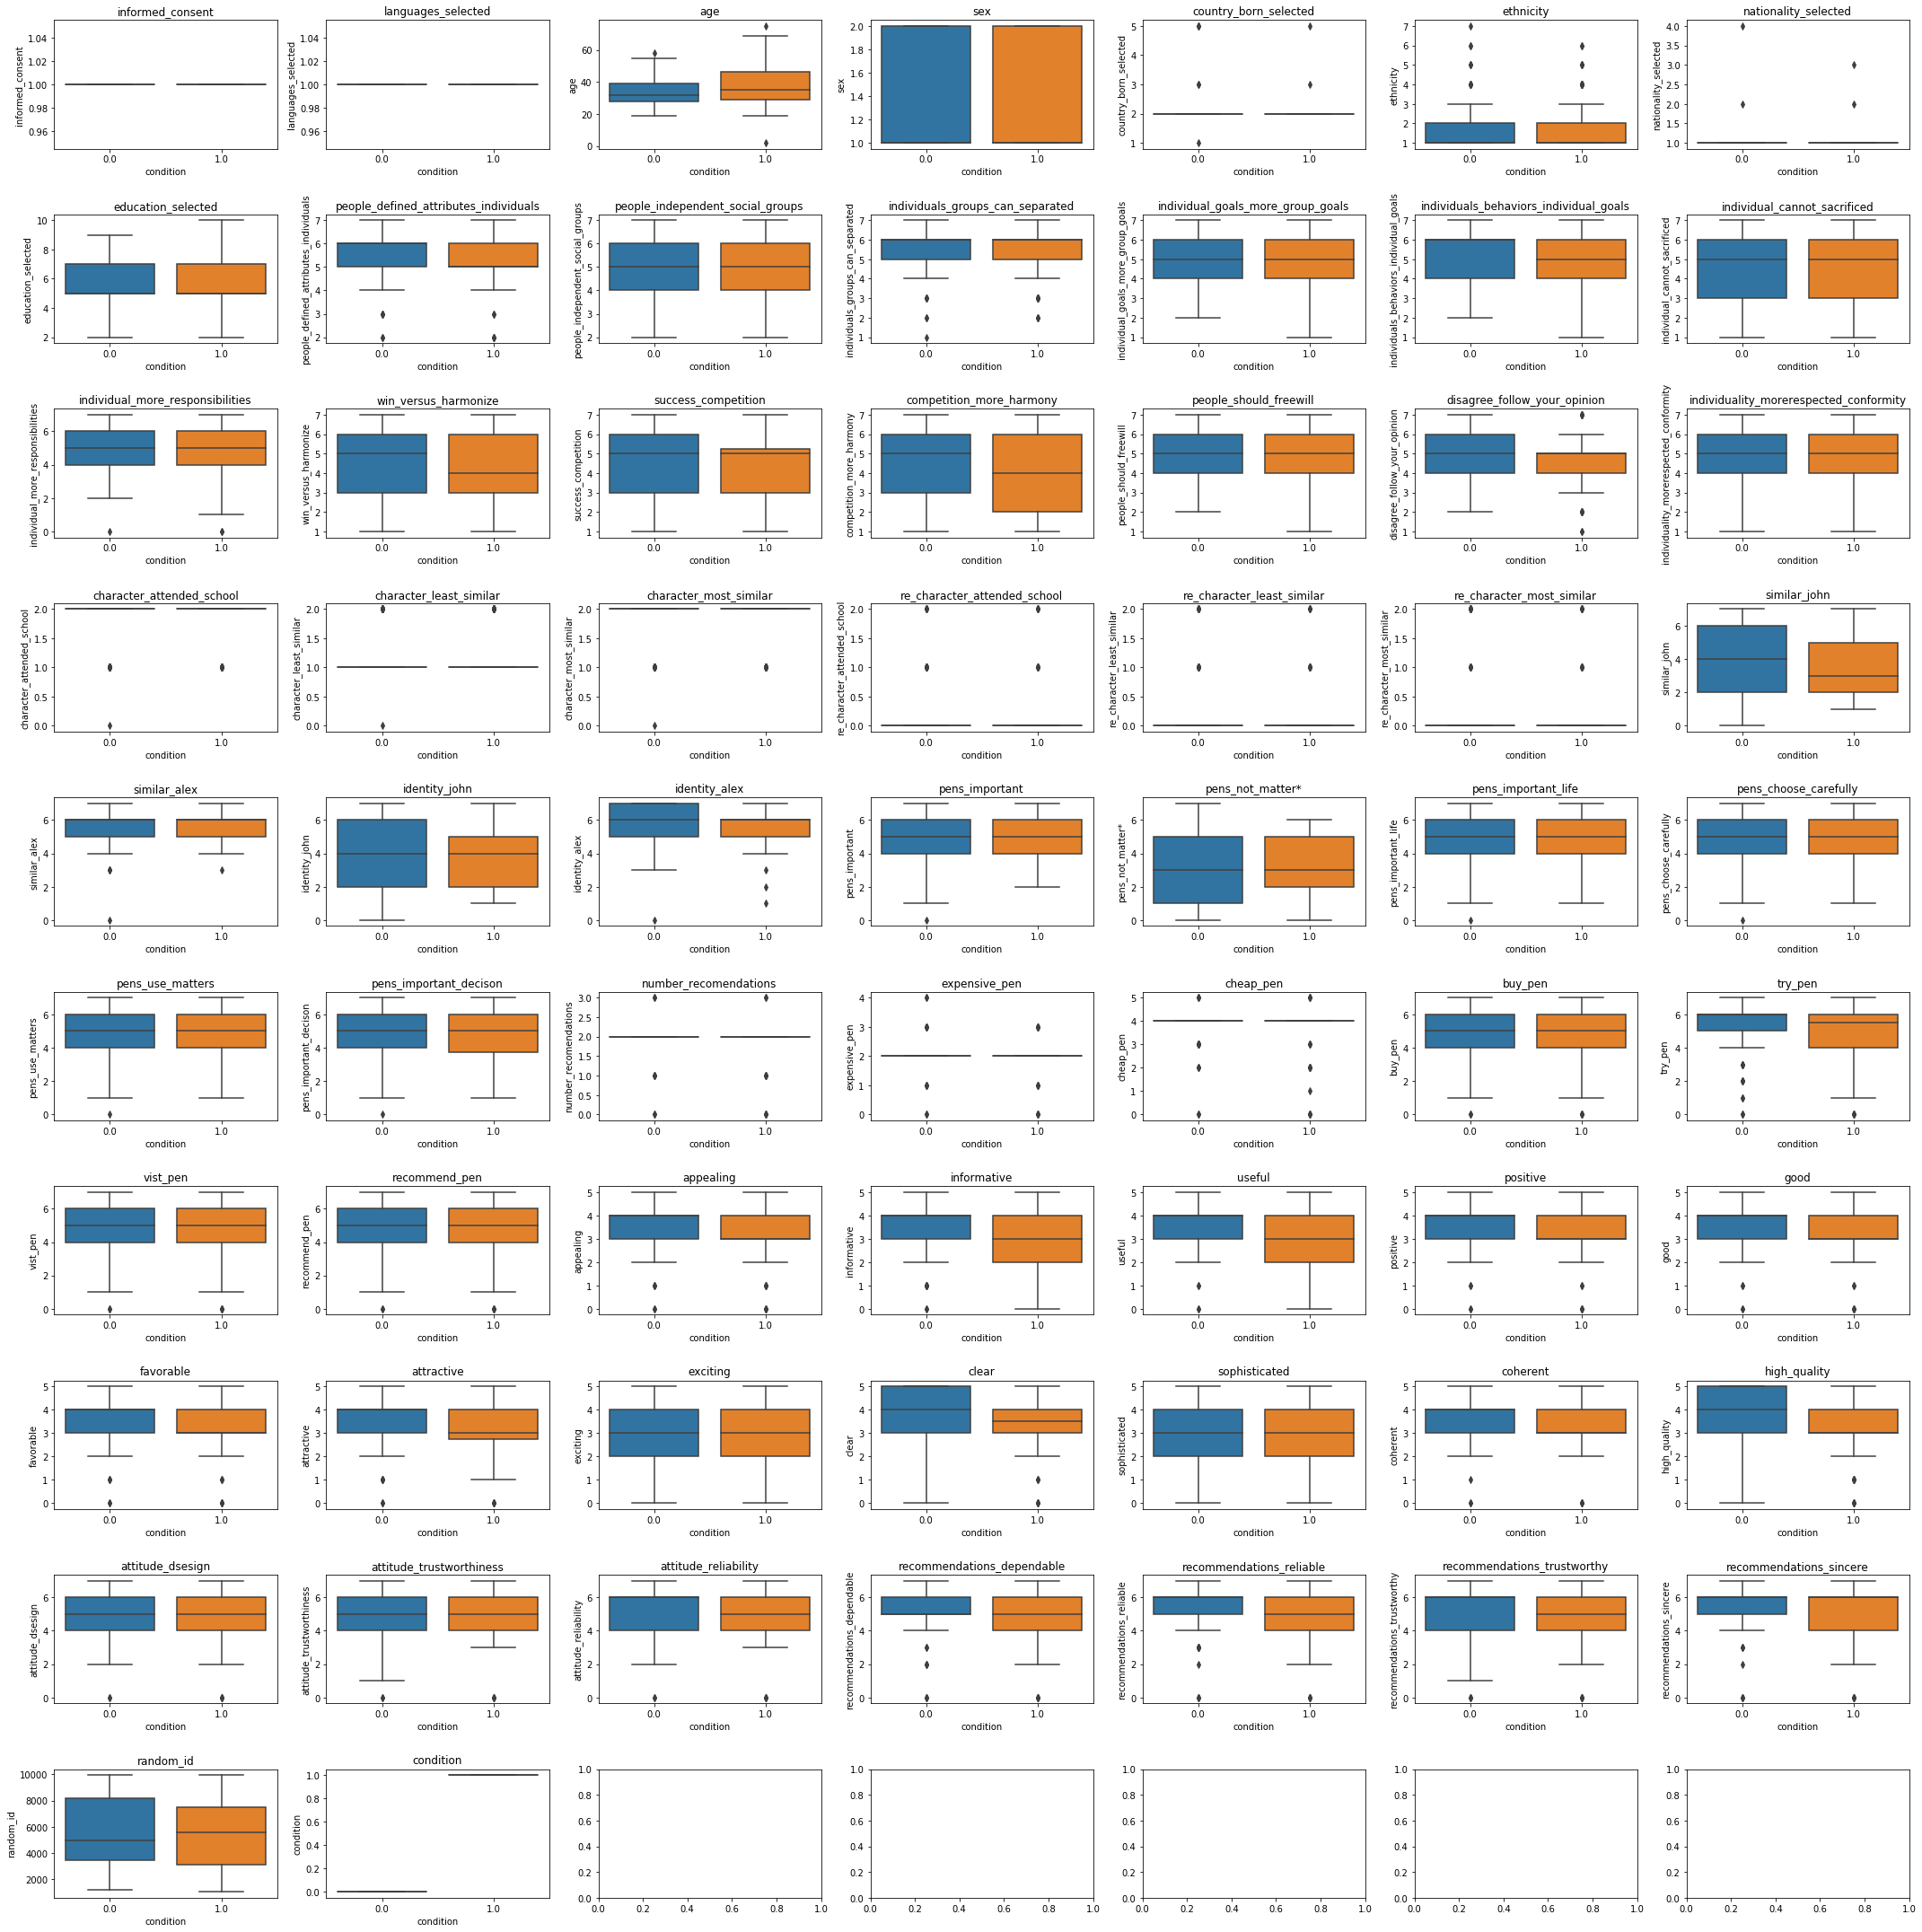

In [0]:
#sns boxplots
fig, ax = plt.subplots(10,7, figsize=(30,30))
ax = ax.ravel()

for idx, col in enumerate(ind_col.columns):
  sns.boxplot(x='condition', y=col, data=ind_col, ax=ax[idx])
  ax[idx].set_title(col)
plt.tight_layout()

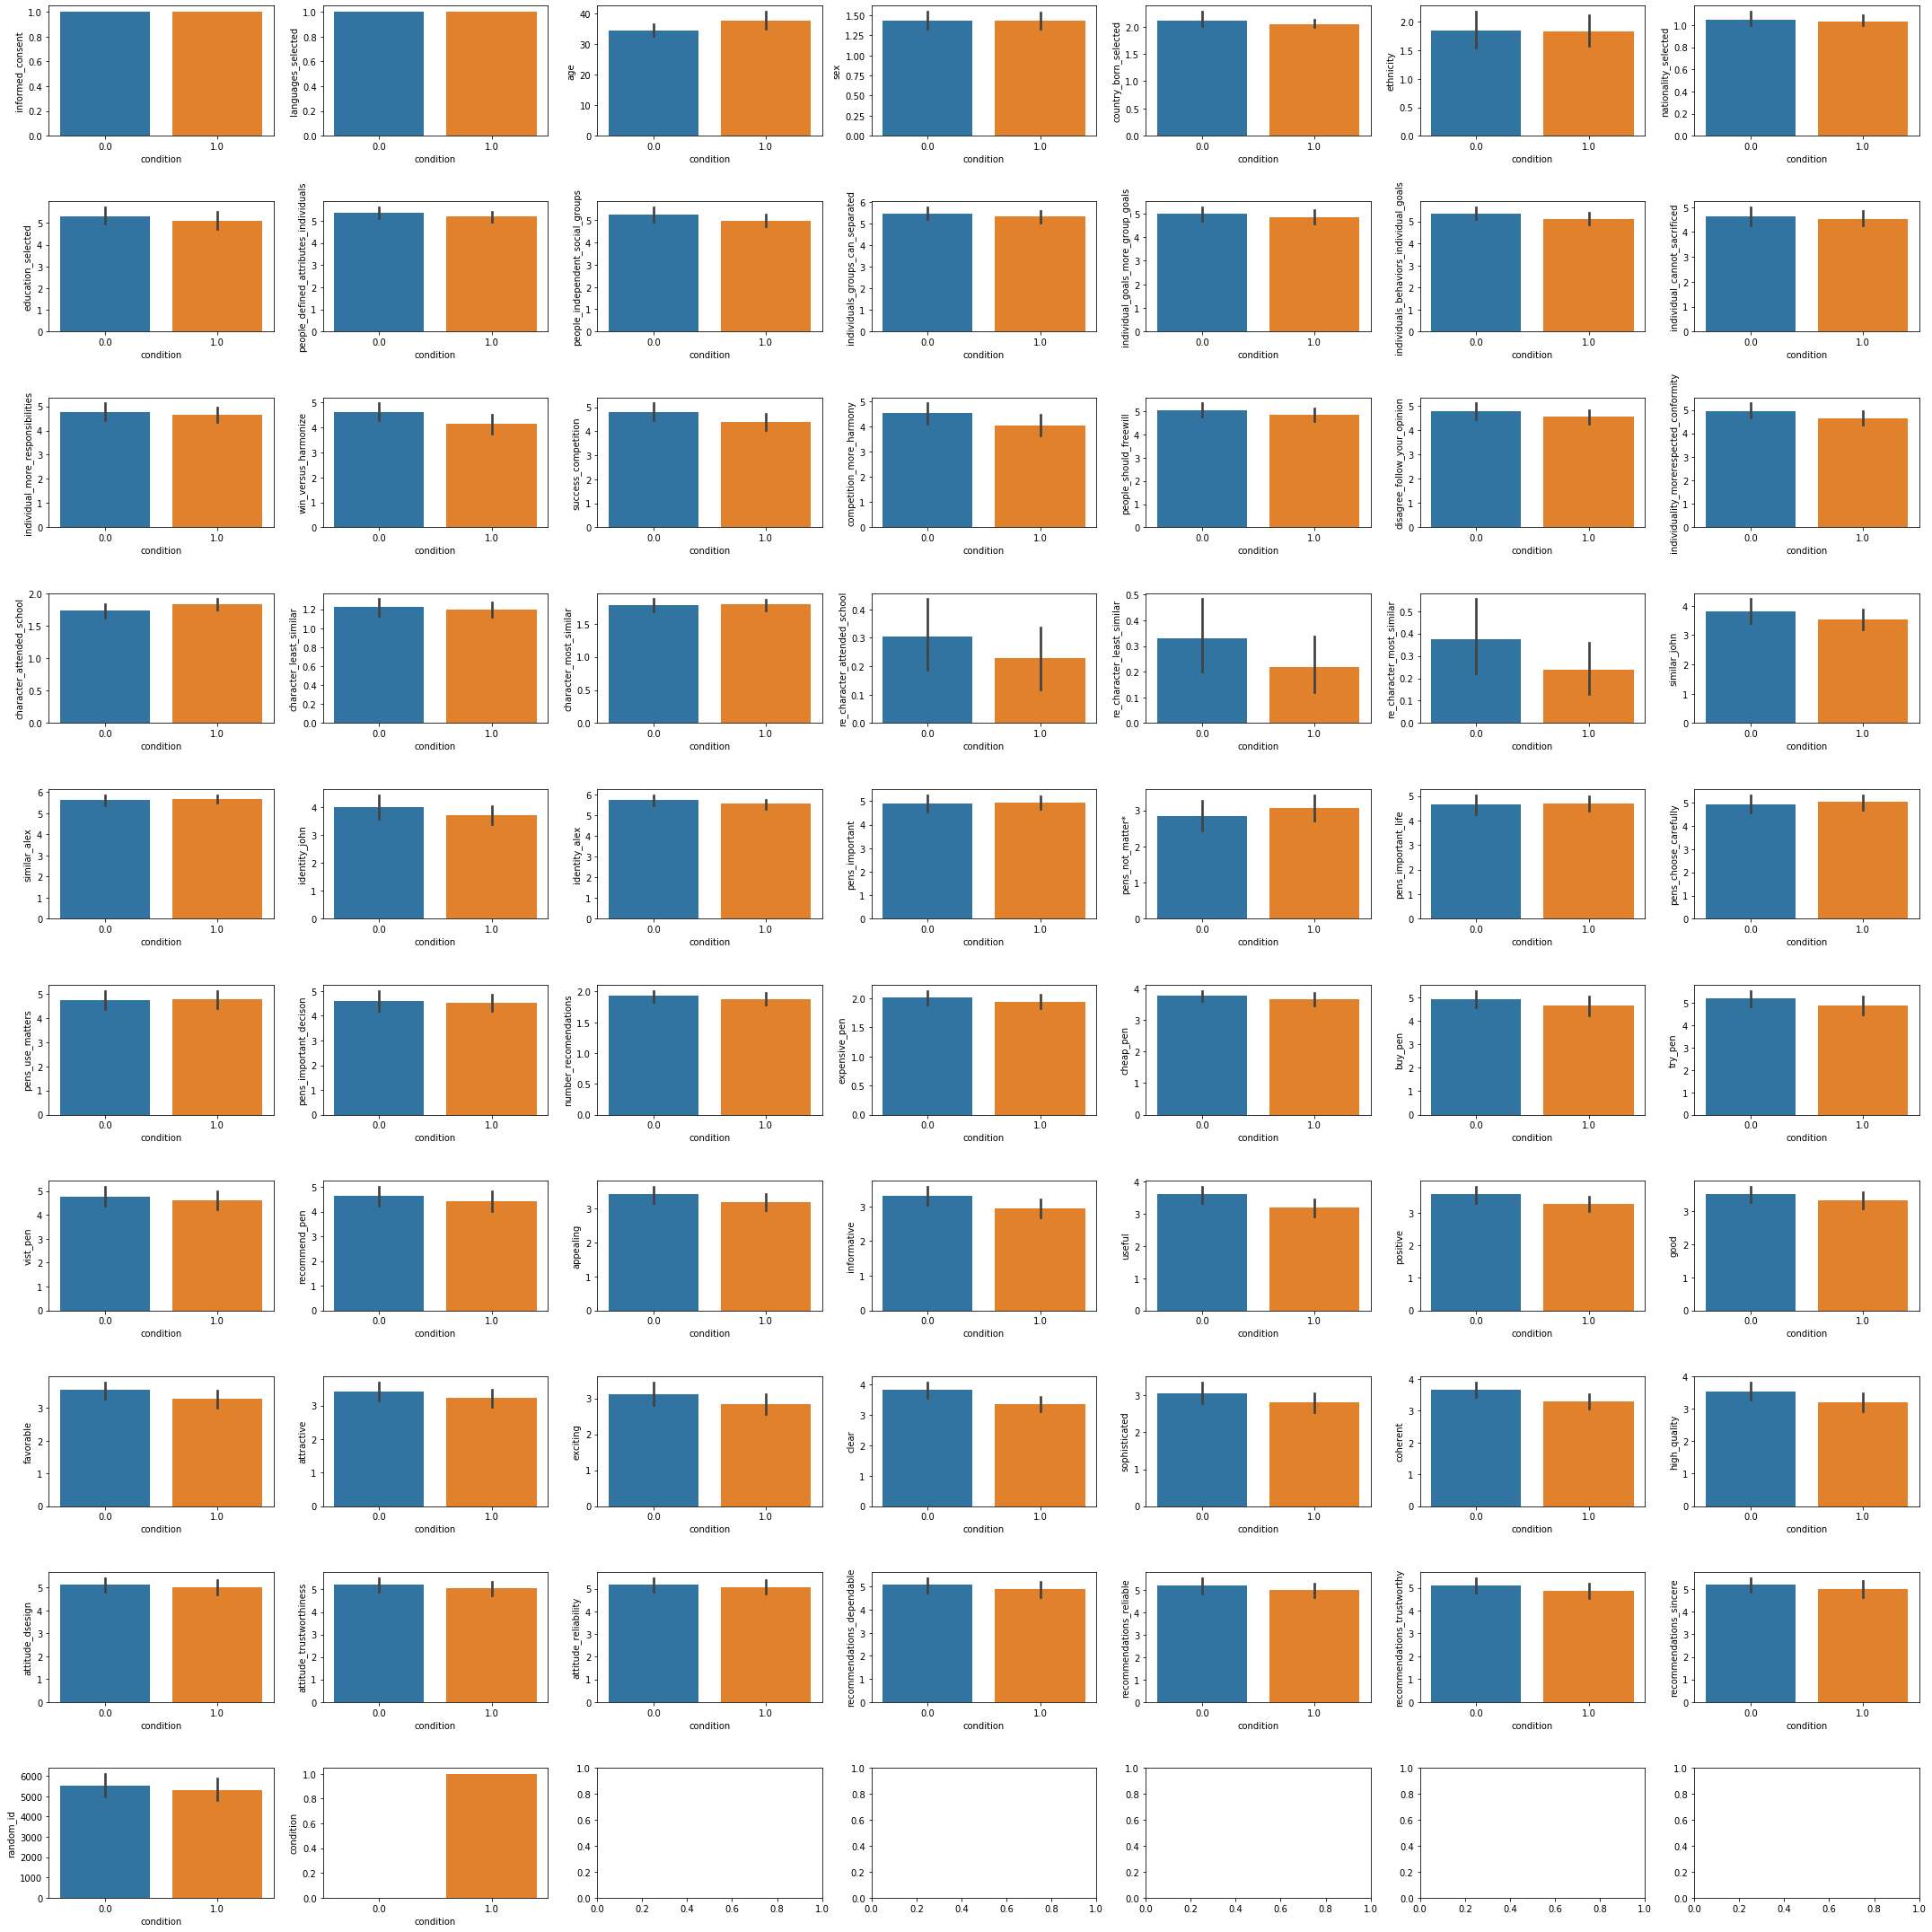

In [0]:
#sns barplots
fig, ax = plt.subplots(10,7, figsize=(30,30))
ax = ax.ravel()

for idx, col in enumerate(ind_col.columns):
  sns.barplot(x='condition', y=col, data=ind_col, ax=ax[idx])
plt.tight_layout()

## HOL-ANALYTICAL DATA

### Assign classes to each ID in HOL-ANA
* IND-COL
* 1 = experiment
* 0 = contorl 

In [0]:
HOL_condition_id_pg1_1_10 = {'NONE':0, 'NONE':'NONE', 'NONE':'NONE', '9835':0,'3892':1,
                             '5323':1, '4793':1, '7425':0, '1677':0, ' 9299':1}

HOL_condition_id_pg1_11_20 = {'4713':1,'1148':0,'4446':0, '1960':1,'1669':1,
                              '7062':0,'4791':1,'5426',:1,'8409':0,'5091':0}

HOL_condition_id_pg2_1_10 = {'7707':1, '1285':0, :'7021':1,'8300':0,'8424':1,
                             '1422':1, '6197':1, '5066':0,'3949':0, '6389':0}

HOL_condition_id_pg2_11_20 = {'6722':0,'2867':0,'6352':1,'1952':1,'4050':0,
                              '6542':1,'6629':1,'1669':0,'6716':0,'4155':1}

HOL_condition_id_pg3_1_10 = {'9917':0,'2866':0,'1138':0,'5351':1,'6555':0,
                            '1469':0'2330':1,'9690':1,'7882':1}



## Scrap 

In [0]:
#previous code - did not work, ind_col didn't get saved as column
# ind_col['ind_score'] = None
# ind_col.loc[ind_col['individual_more_responsibilities'] == 0, 'ind_score'] = (ind_col[individualism_cols].sum(axis=1))/(len(individualism_cols)-1) 
# ind_col.loc[ind_col['individual_more_responsibilities'] != 0, 'ind_score'] = (ind_col[individualism_cols].sum(axis=1))/len(individualism_cols) 

In [0]:
#IND-COL
# condition_id_pg1_1_10 = {'1573': 1, '1315':0, '6375':0, '7787': 1, '4139':1, ' 6407': 1, 
#                 '4172':0, '7134':0, ' 6426':0, '2950':0}
# condition_id_pg1_11_20 = {'9478':0, '5635':0, '3439':1, '5346':1, '8832':0, '7895':0, '9856':1, 
#                           '1568':1, '1568':0, '8821':0}
# condition_id_pg2_1_10 = {'8075':0, '3135':1, '7185':0,'7008':0, '5813':1, '1209':0, '3133':1,
#                          '4852':0, '3709':1, '4849':0}
# condition_id_pg2_11_20 = {'6449':0, '8237':0,'7361':1, '9989':1,'6012':1,' 5989':1, '3656':0,
#                           '6405':0, '9129':1, '2465':1}
# condition_id_pg3_1_10 = {'2840':0,'3032':0,'6372':0,'4262':0,'2473':0,'7105':0,
#                          '2495':1, '2407':0, '3503':0, '9032':1}
# condition_id_pg3_11_20 = {'9266':1, '1734':1, '9560':1, '2593':1, '6478':1,'6026':0,
#                          '7342':0,'8193':0,'7661':0,'2535':1}
# condition_id_pg4_1_10 = {'2798':0, '9644':0, '1960':1, '1609':1, '1757':1, '8505':1,
#                          '1982':0, '2545':1, ' 6138':0, '2101':0}
# condition_id_pg4_11_20 = {'9633':0,'4557':1,'2329':1,'4485':1,'3000':0,'7754':1,'1028':1,
#                           '8916':0,'2092':1,'3456':0}
# condition_id_pg5_1_10 = {'NONE':1, '7613':0, '8022':1, '8821':0, '9009':1, '8667':1,
#                          '8999':0, '7565':0, '4287':1,'2057':1}
# condition_id_pg5_11_20 = {'3927':0,'4522':1,'9249':1,'7170':0,'6743':0,'8398':0,
#                           '1214':1,'3235':0,'7249':1}
# condition_id_pg1_NEW_1_10 = {'8909':1, '7500':1, '1083':1, '1202':0, '4573':1, 
#                              '5891':1,'1431':0,'8709':0, '1044':1, '3297':0}
# ind_col_condition= {'1573': 1, '1315':0, '6375':0, '7787': 1, '4139':1, ' 6407': 1, 
#                 '4172':0, '7134':0, ' 6426':0, '2950':0, '9478':0, '5635':0, '3439':1, '5346':1, '8832':0, '7895':0, '9856':1, 
#                           '1568':1, '1568':0, '8821':0,'8075':0, '3135':1, '7185':0,'7008':0, '5813':1, '1209':0, '3133':1,
#                          '4852':0, '3709':1, '4849':0,'6449':0, '8237':0,'7361':1, '9989':1,'6012':1,' 5989':1, '3656':0,
#                           '6405':0, '9129':1, '2465':1,'2840':0,'3032':0,'6372':0,'4262':0,'2473':0,'7105':0,
#                          '2495':1, '2407':0, '3503':0, '9032':1,'9266':1, '1734':1, '9560':1, '2593':1, '6478':1,'6026':0,
#                          '7342':0,'8193':0,'7661':0,'2535':1,'2798':0, '9644':0, '1960':1, '1609':1, '1757':1, '8505':1,
#                          '1982':0, '2545':1, ' 6138':0, '2101':0,'9633':0,'4557':1,'2329':1,'4485':1,'3000':0,'7754':1,'1028':1,
#                           '8916':0,'2092':1,'3456':0, '7613':0, '8022':1, '8821':0, '9009':1, '8667':1,
#                          '8999':0, '7565':0, '4287':1,'2057':1, '3927':0,'4522':1,'9249':1,'7170':0,'6743':0,'8398':0,
#                           '1214':1,'3235':0,'7249':1}